# 05： Fluid parameter estimation

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.size']=14
plt.rcParams['font.family']='arial'

<div class="alert alert-block alert-success">
<b>Learning Objectives:</b>
<ul>
    <li>Batzle and Wang fluid parameter estimation</li>
</ul>
</div>

Seismic Fluid properties are greatly influenced enviromental factors and fluid compositionin. Batzle and Wang's thermodynamic based relations allow ones to estimate *in-situ* fluid properties such as densities, bulk moduli, velocities, and viscosities of common pore fluids honoring fluid composition, temperature and pressure. 

Here we present how to compute in situ properties of gas and cruent oil according to the approach proposed by Batzle and Wang (1992), For detailed explanation and derivation, readers are referred to the orginal paper: 

**Reference**: Batzle, M. and Wang, Z., 1992. Seismic properties of pore fluids. Geophysics, 57(11), pp.1396-1408.

# Gas
when a rough idea of the gas gravity is known, a good estimate can be made of the gas properties at a specified pressure and temperature
- what is gas gravity?

Gas mixtures are characterized by a specific gravity, G, the ratio of the gas density to air density at 15.6°C and atmospheric pressure. Typical gases have G values from 0.56 for nearly pure methane to greater than 1.8 for gases with heavier components of higher carbon number.

In order to estimate the gas density and modulus, we also need to calculated the pseudoredueced pressure and pseudoredueced temperature. For mixtures, this point of phase homogenization
depends on the composition and is referred to as the pseudocritical point with pseudocritical temperature Tpc and pressure Ppc, Thomas et al., (1970) examined numerous natural
gases and found simple relationships between G and the pseudoreduced pressure Ppr and pseudoreduced temperature Tpr

In [2]:
def pseudo_p_t(P,T,G):
    """Calculate the pseudoreduced temperature and pressure according to Thomas et al. 1970. Written by Jiaxin Yu (July 2021)

    Args:
        P (MPa): pressure
        T (°C): Temperature
        G (dimensionless): Gas gravity

    Returns:
        Ta: absolute temperature
        Ppr:pseudoreduced pressure 
        Tpr:pseudoreduced temperature 
    """    

    # convert the temperature to absolute temperature
    Ta=T+273.15
    P_pr=P/(4.892-0.4048*G)
    T_pr=Ta/(94.72+170.75*G)
    return Ta,P_pr,T_pr

def rho_K_gas(P, T, G):
    """Estimate the Gas density and bulk modulus at specific temperature and pressure. Written by Jiaxin Yu (July 2021)
    Args:
        P (MPa): pressure
        T (°C): Temperature
        G (dimensionless): Gas gravity

    Returns:
        rho: Gas density
        K: Gas bulk modulus
    """    
    R=8.3145 # J.mol-1K-1 gas constant 
    Ta,P_pr,T_pr=pseudo_p_t(P,T,G)
    E=0.109*(3.85-T_pr)**2*np.exp(-(0.45+8*(0.56-1/T_pr)**2)*P_pr**1.2/T_pr)
    Z=(0.03+0.00527*(3.5-T_pr)**3)*P_pr+(0.642*T_pr-0.007*T_pr**4-0.52)+E 
    rho=28.8*G*P/(Z*R*Ta)

    r_0=0.85+5.6/(P_pr+2)+27.1/(P_pr+3.5)**2-8.7*np.exp(-0.65*(P_pr+1))
    dz_dp=(0.03+0.00527*(3.5-T_pr)**3)+0.109*(3.85-T_pr)**2*1.2*P_pr**0.2*-(0.45+8*(0.56-1/T_pr)**2)/T_pr*np.exp(-(0.45+8*(0.56-1/T_pr)**2)*P_pr**1.2/T_pr)
    K=P/(1-P_pr*dz_dp/Z)*r_0
    return rho,K

Text(0, 0.5, 'Gas density (g/cm3)')

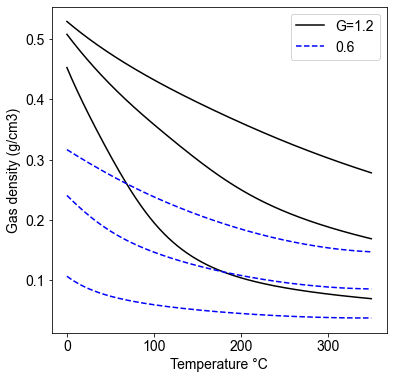

In [3]:
temp=np.linspace(0,350,600)
rho,_=rho_K_gas(10,temp,1.2)
rho4,_=rho_K_gas(50,temp,1.2)
rho5,_=rho_K_gas(25,temp,1.2)

rho1,_=rho_K_gas(10,temp,0.6)
rho2,_=rho_K_gas(50,temp,0.6)
rho3,_=rho_K_gas(25,temp,0.6)
plt.figure(figsize=(6,6))
plt.plot(temp,rho,'-k')
plt.plot(temp,rho4,'-k')
plt.plot(temp,rho5,'-k',label='G=1.2')

plt.plot(temp,rho1,'--b')
plt.plot(temp,rho2,'--b')
plt.plot(temp,rho3,'--b',label='0.6')
plt.legend(loc='best')
plt.xlabel('Temperature °C')
plt.ylabel('Gas density (g/cm3)')

# Oil
-What is oil API?

Under room conditions, oil densities can vary from under 0.5 g/cm3 to greater than 1 g/cm3, with most produced oils in the 0.7 to 0.8 g/cm3 range. A reference
density that can be used to characterize an oil $\rho_0$ is measured at 15.6°C and atmospheric pressure. A widely used classification of crude oils is the American Petroleum Institute oil
gravity (API) number and is defined as 
$API=141.5/\rho_0 -131.5$
- For an oil that remains constant in composition, the effects of pressure and temperature are largely independent. The pressure dependence is
comparatively small and the published data for density at pressure Pp can be described by the polynomial relation in Batzle and Wang's method.

In [4]:
def rho_K_oil(P,T,den):
    """Estimate the oil density and bulk modulus at specific temperature and pressure. Written by Jiaxin Yu (July 2021)

    Args:
        P (MPa): Pressure
        T (°C): temperature
        den (g/cm3): oil density
    Returns:
        rho: oil density
        K: oil bulk modulus
    """    
    rho_p=den+(0.00277*P-1.71*0.0000001*P**3)*(den-1.15)**2+3.49*0.0001*P
    rho=rho_p/(0.972+3.81*0.0001*(T+17.78)**1.175)
    v=2096*(den/(2.6-den))**0.5-3.7*T+4.64*P+0.0115*(4.12*(1.08/den-1)**0.5-1)*T*P
    K=rho*v**2
    return rho, K

In [5]:
temp=np.linspace(0,350,600)

rho1,G1=rho_K_oil(50,temp,1.)
rho2,G2=rho_K_oil(25,temp,1.)
rho3,G3=rho_K_oil(0.1,temp,1.)

rho4,G4=rho_K_oil(50,temp,0.88)
rho5,G5=rho_K_oil(25,temp,0.88)
rho6,G6=rho_K_oil(0.1,temp,0.88)

rho7,G7=rho_K_oil(50,temp,0.78)
rho8,G8=rho_K_oil(25,temp,0.78)
rho9,G9=rho_K_oil(0.1,temp,0.78)



Text(0, 0.5, 'Oil density (g/cm3)')

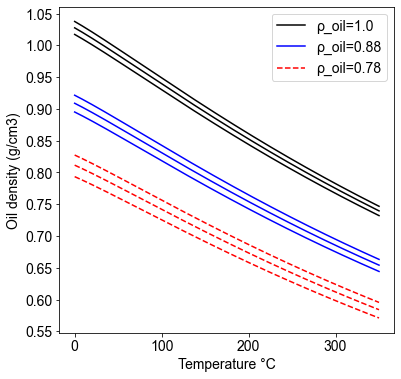

In [6]:
plt.figure(figsize=(6,6))
plt.plot(temp,rho1,'-k',label='ρ_oil=1.0')
plt.plot(temp,rho2,'-k')
plt.plot(temp,rho3,'-k')

plt.plot(temp,rho4,'-b',label='ρ_oil=0.88')
plt.plot(temp,rho5,'-b')
plt.plot(temp,rho6,'-b')

plt.plot(temp,rho7,'--r',label='ρ_oil=0.78')
plt.plot(temp,rho8,'--r')
plt.plot(temp,rho9,'--r')
plt.yticks(np.arange(0.55, 1.1,0.05))
plt.legend(loc='best')
plt.xlabel('Temperature °C')
plt.ylabel('Oil density (g/cm3)')

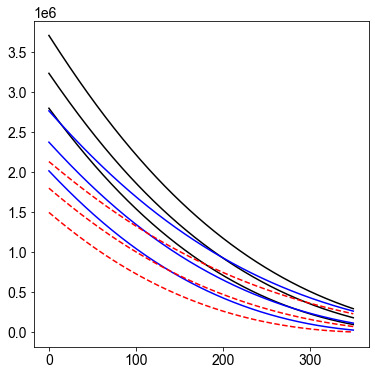

In [7]:
plt.figure(figsize=(6,6))
plt.plot(temp,G1,'-k')
plt.plot(temp,G2,'-k')
plt.plot(temp,G3,'-k')

plt.plot(temp,G4,'-b')
plt.plot(temp,G5,'-b')
plt.plot(temp,G6,'-b')

plt.plot(temp,G7,'--r')
plt.plot(temp,G8,'--r')
plt.plot(temp,G9,'--r')

# Gas saturated oil
Large amounts of gas or light hydrocarbons can go into solution in crude oils. We would expect gas
saturated oils (live oils) to have significantly different properties than the gas-free oils (dead oils) commonly measured. As an oil is produced, the original single phase fluid will
separate into a gas and a liquid phase. 
- What is gas oil ratio?

The original fluid in-situ is usually characterized by RG, the volume ratio of liberated gas to remaining oil at atmospheric pressure and 15.6°C.

In [8]:
def rho_K_go(P, T, den,G,Rg):
    """compute velocity, density and bulk modulus of live oil. Written by Jiaxin Yu (July 2021)

    Args:
        P (MPa): Pressure
        T (°C): temperature
        den (g/cm3): oil density
        G (dimensionless): gas gravity 
        Rg (Liter/Liter): the volume ratio of liberated gas to remaining oil at atmospheric pressure andc15.6°C

    Returns:
        v (m/s): velocity
        rho_g (g/cm3): true density of live oil at saturation
        K (GPa): true bulk modulus of live oil at saturation
    """    
    
    if Rg == None:
        Rg=0.02123*G*(P*np.exp(4.072/den-0.00377*T))**1.205
    
    B=0.972+0.00038*(2.4*Rg*(G/den)**0.5+T+17.8)**1.175
    rho_p=den*(1+0.001*Rg)**-1*B**-1 # pseudodensity
    v=2096*(rho_p/(2.6-rho_p))**0.5-3.7*T+4.64*P+0.0115*(4.12*(1.08/rho_p-1)**0.5-1)*T*P
    # true density of live oil at saturation
    rho_g=(den+0.0012*G*Rg)/B
    K=rho_g*v**2
    return v,rho_g, K

Text(0, 0.5, 'Velocity (M/s)')

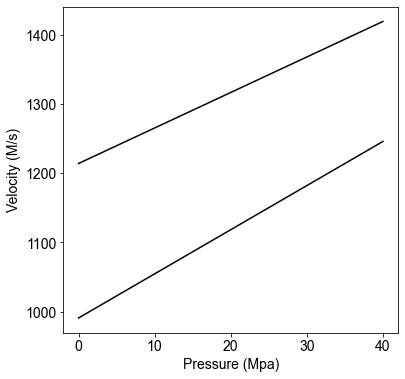

In [9]:
pressure=np.linspace(0,40,100)
v1,_,_=rho_K_go(pressure,22.8,0.916,0.6,85)
v2,_,_=rho_K_go(pressure,72,0.916,0.6,85)
plt.figure(figsize=(6,6))
plt.plot(pressure,v1,'-k')
plt.plot(pressure,v2,'-k')
plt.xlabel('Pressure (Mpa)')
plt.ylabel('Velocity (M/s)')